Load and normalize CIFAR10

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


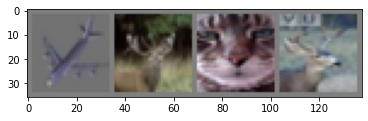

plane deer  cat   deer 


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Define a Convolutional Neural Network

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
net = Net()

Define a Loss function and optimizer

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train th network

In [23]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 1.265
[1,  4000] loss: 1.237
[1,  6000] loss: 1.253
[1,  8000] loss: 1.261
[1, 10000] loss: 1.252
[1, 12000] loss: 1.268
[2,  2000] loss: 1.234
[2,  4000] loss: 1.274
[2,  6000] loss: 1.272
[2,  8000] loss: 1.246
[2, 10000] loss: 1.271
[2, 12000] loss: 1.246
[3,  2000] loss: 1.270
[3,  4000] loss: 1.258
[3,  6000] loss: 1.248
[3,  8000] loss: 1.274
[3, 10000] loss: 1.248
[3, 12000] loss: 1.248
[4,  2000] loss: 1.260
[4,  4000] loss: 1.263
[4,  6000] loss: 1.253
[4,  8000] loss: 1.274
[4, 10000] loss: 1.242
[4, 12000] loss: 1.247
[5,  2000] loss: 1.243
[5,  4000] loss: 1.260
[5,  6000] loss: 1.259
[5,  8000] loss: 1.266
[5, 10000] loss: 1.253
[5, 12000] loss: 1.256
Finished Training


In [24]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Test the ntwork on the test data

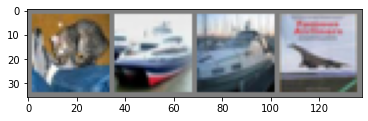

GroundTruth:  cat   ship  ship  plane


In [25]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [26]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [27]:
outputs = net(images)

In [28]:
_, predicted = torch.max(outputs, 1)

print('Preedicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Preedicted:  cat   ship  ship  plane


In [29]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10,000 test images: {100 * correct // total} %')

Accuracy of the network on the 10,000 test images: 53 %


In [30]:
correct_pred = {classname:0 for classname in classes}
total_ped = {classname:0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_ped[classes[label]] += 1
            
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_ped[classname]
    print(f'Accurracy forr class: {classname:5s} is {accuracy:.1f} %')

Accurracy forr class: plane is 55.1 %
Accurracy forr class: car   is 69.7 %
Accurracy forr class: bird  is 42.1 %
Accurracy forr class: cat   is 37.4 %
Accurracy forr class: deer  is 57.2 %
Accurracy forr class: dog   is 37.1 %
Accurracy forr class: frog  is 74.9 %
Accurracy forr class: horse is 55.7 %
Accurracy forr class: ship  is 66.9 %
Accurracy forr class: truck is 35.2 %


Taining on GPU

In [31]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [32]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)